<div class="alert alert-success"><h1>Using a Pretrained Model for Image Classification in Python</h1></div>

In this tutorial, you'll learn how to use a pretrained **YOLO** model for **image classification** in Python. Image classification is one of the most fundamental tasks in computer vision. It involves assigning a single label to an entire image based on the dominant object or scene it contains. The output of an image classifier is a class label along with a confidence score indicating how certain the model is about its prediction. This task is especially useful when you're interested in identifying what type of object is present in an image, without needing to know its exact location or shape.

## Learning Objectives
By the end of this tutorial, you will know:
+ How to load and prepare a YOLO image classification model for inference
+ How to run inference and interpret raw and formatted outputs including top‑1 and top‑5 predictions

## Prerequisites
Before we begin, please ensure that you have:
+ A working knowledge of Python, including variables, functions, loops, and basic object-oriented programming.
+ A Python (version 3.x) environment with the `ultralytics`, `matplotlib`, and `Pillow` packages installed.

<hr>

## YOLO ("You Only Look Once")
YOLO, short for "You Only Look Once", is a family of high-performance deep learning models originally designed for real-time object detection. However, recent versions of YOLO have been adapted for image classification tasks as well, offering a powerful combination of speed and accuracy across a range of model sizes. Unlike traditional classification models, YOLO models are optimized for fast inference, making them suitable for edge devices and real-time applications.

Visit "https://docs.ultralytics.com/tasks/classify/" for a summary of available YOLO11 models specifically designed for image classification. These models are pretrained on the **ImageNet** dataset and offer a trade-off between accuracy, speed, and computational complexity.

## 1. Load the Pretrained Model
First we import the YOLO class and load the pretrained classification model. Ultralytics will download the weights if needed and initialize the model for inference.

In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
 from ultralytics import YOLO
 model = YOLO('yolo11n-cls.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 64.7MB/s]


The model is now ready for inference. We can choose other available models depending on the accuracy and speed trade-off we're targeting.

## 2. Specify the Input Image
Next, we define the path to the image file we want to classify.

In [23]:
image_path = ['mouse.jpeg','mano.jpeg', 'g.jpeg']

However, before running the classification, let's display the image so we can visually confirm the input. This helps ensure the file path is correct and that the model will see the expected content.

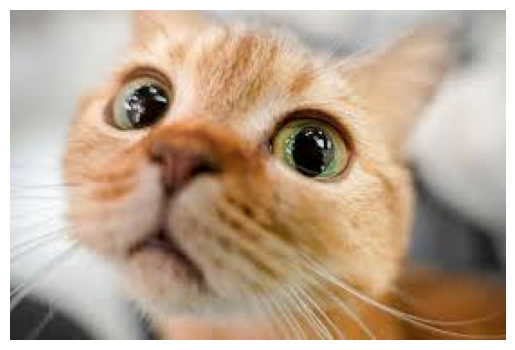

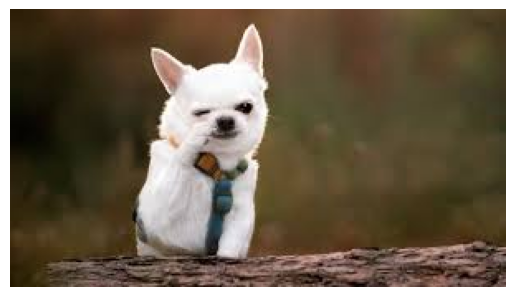

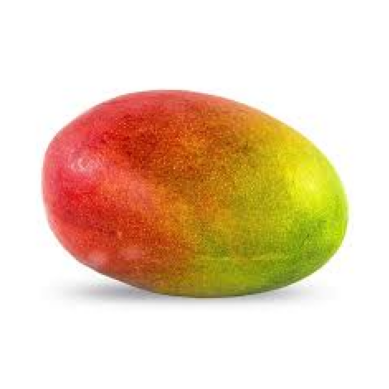

In [24]:
from PIL import Image
import matplotlib.pyplot as plt

for i in range(len(image_path)):
  img = Image.open(image_path[i])
  plt.imshow(img)
  plt.axis('off')
  plt.show()

## 3. Classify the Input Image
Now we pass the image path to the model. This automatically resizes the image to the model’s expected dimensions (224 × 224), normalizes pixel values, and batches the input (if we pass several images).

In [25]:
results =model(image_path)


0: 224x224 Persian_cat 0.52, Egyptian_cat 0.11, tiger_cat 0.08, tabby 0.06, indri 0.04, 16.1ms
1: 224x224 Chihuahua 0.63, toy_terrier 0.06, dingo 0.05, French_bulldog 0.04, muzzle 0.02, 16.1ms
2: 224x224 Granny_Smith 0.49, croquet_ball 0.17, tennis_ball 0.11, lemon 0.06, acorn 0.04, 16.1ms
Speed: 3.1ms preprocess, 16.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


The output is a summary line showing the full file path, the resized dimensions, the top class predictions with their confidence scores, and timing information for preprocessing, inference, and postprocessing.

To make the output more learner‑friendly, we extract the top‑1 and top‑5 predictions. We then print them with class names and confidence percentages. This also helps us understand other plausible predictions the model considered.

In [26]:
for result in results:
  probs = result.probs
  class_idx = probs.top1
  class_name = result.names[class_idx]
  confidence = probs.top1conf.item()

  print(f'\nTop-1 prediction: {class_name} ({confidence:.2%})')
  print('Top-5 predictions:')
  for idx, conf in zip(probs.top5, probs.top5conf):
    print(f'{result.names[idx]}: {conf:.2%}')



Top-1 prediction: Persian_cat (51.60%)
Top-5 predictions:
Persian_cat: 51.60%
Egyptian_cat: 10.70%
tiger_cat: 8.42%
tabby: 6.11%
indri: 4.32%

Top-1 prediction: Chihuahua (62.82%)
Top-5 predictions:
Chihuahua: 62.82%
toy_terrier: 5.68%
dingo: 5.14%
French_bulldog: 4.38%
muzzle: 1.67%

Top-1 prediction: Granny_Smith (49.16%)
Top-5 predictions:
Granny_Smith: 49.16%
croquet_ball: 17.07%
tennis_ball: 11.20%
lemon: 6.02%
acorn: 3.55%


Finally we display the image again with a title that shows the top‑1 prediction and its confidence score. This gives a visual confirmation of the result.

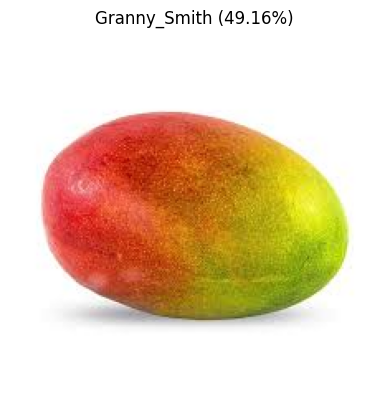

In [27]:
plt.imshow(img)
plt.title(f'{class_name} ({confidence:.2%})')
plt.axis('off')
plt.show()

In this tutorial we learned how to use a pretrained YOLO model to perform image classification in Python. As next steps you can try classifyuing a different image, automate the pipeline for multiple images, save predictions to a CSV file, or integrate the code into a web service or mobile application. The techniques we explored here provide you with the foundation you need to apply image classification to real‑world tasks and datasets.